<a href="https://colab.research.google.com/github/gummadidalaashishkumar/AI-ML-Internship-Task-3/blob/main/Netflix-Movies-and-TV-Shows-Data-Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


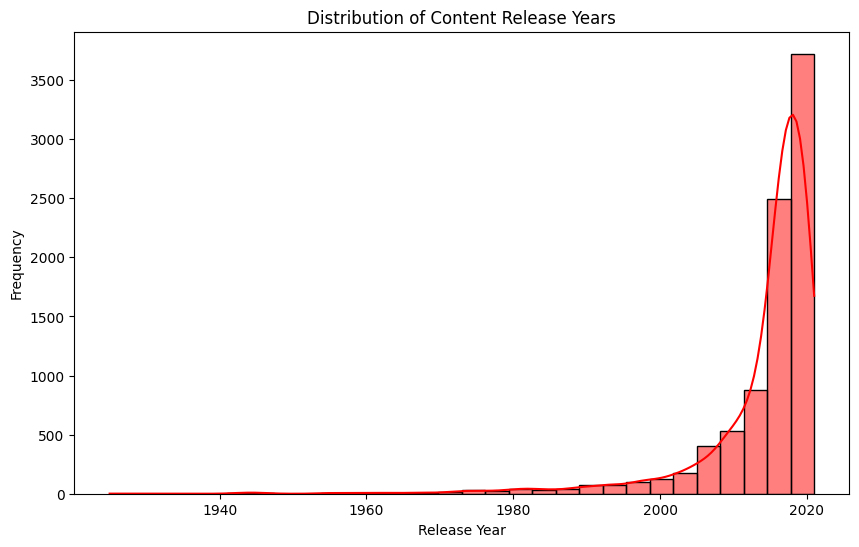

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='red')
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

The distribution is heavily "left-skewed," meaning the vast majority of content on Netflix was released after 2010. Production peaked significantly around 2018–2019.

/tmp/ipython-input-659487647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Reds')


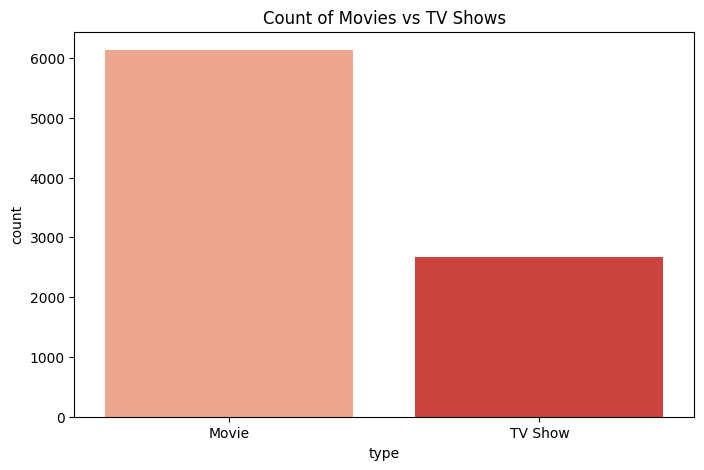

/tmp/ipython-input-659487647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10], palette='viridis')


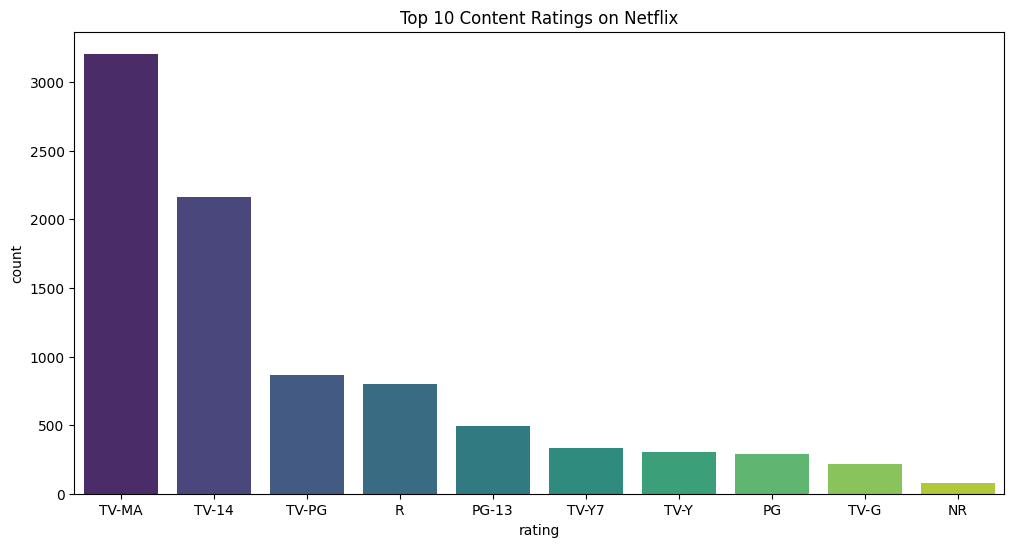

In [9]:
# Comparison of Movies and TV Shows
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='Reds')
plt.title('Count of Movies vs TV Shows')
plt.show()

# Top 10 Ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Content Ratings on Netflix')
plt.show()

Netflix has significantly more Movies than TV Shows. The most frequent rating is "TV-MA" (for mature audiences), followed by "TV-14," indicating a focus on adult and teen viewers.

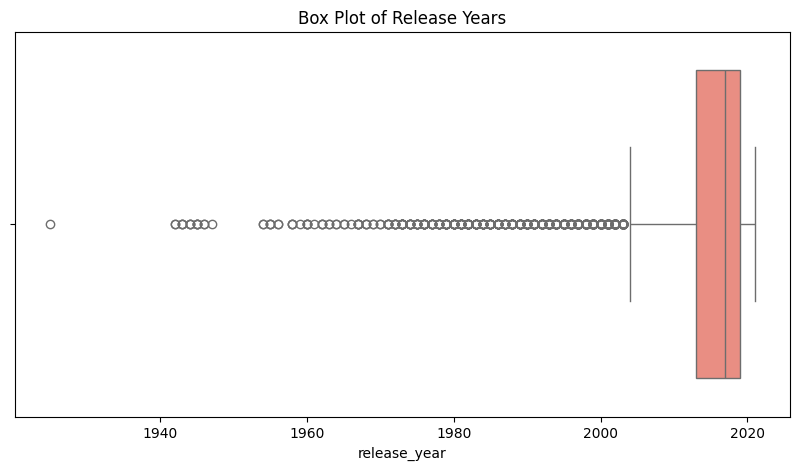

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['release_year'], color='salmon')
plt.title('Box Plot of Release Years')
plt.show()

The box plot shows many "outliers" on the left side (dots before the 2000s). This indicates that while Netflix focuses on new content, it also maintains a collection of classic films dating back as far as the 1920s

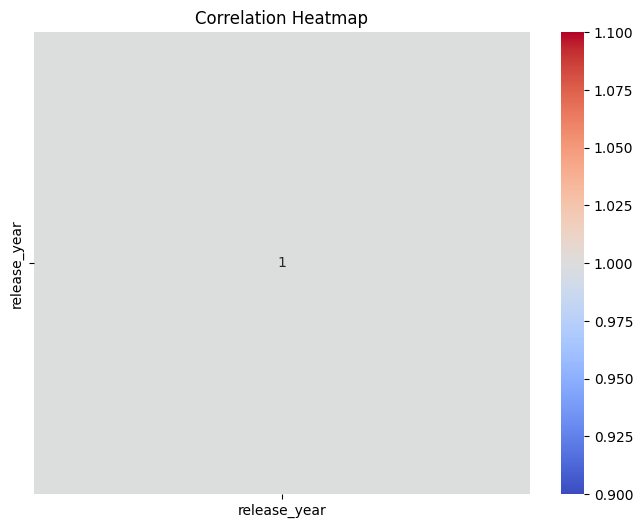

In [11]:
# Since the dataset is mostly text, we look at the correlation of available numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Because the dataset mostly contains text/categories, there are few numerical correlations. However, this highlights that our analysis should focus more on text-based features like Genres and Directors for predictions.

Features for Machine Learning Prediction
If we were to build a recommendation or classification model, the following features are most important: * type: Determines if the user prefers long-form series or single movies. * listed_in (Genre): The primary factor in recommending similar content. * rating: Crucial for age-appropriate filtering and audience targeting. * country: Helps in predicting regional popularity and cultural trends. * cast / director: High "star power" often predicts higher viewership.

Project Summary
* Content Growth: Netflix content exploded in volume after 2015, with a massive library of modern titles. * Dominant Type: Movies make up more than 70% of the platform's library compared to TV Shows. * Target Audience: The platform heavily leans towards Mature (TV-MA) and Teen (TV-14) audiences. * Global Content: While the US is the top producer, there is a strong presence of international content, particularly from India and the UK.